In [314]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [315]:
# Load dataset
df = pd.read_csv('../datasets/50_Startups.csv')

In [316]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,NaN,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,NaN,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [317]:
df.isnull().sum()

R&D Spend          1
Administration     3
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [318]:
# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [319]:
# Define categorical and numerical columns
cat_cols = ["State"]
num_cols = [col for col in X.columns if col not in cat_cols]

<Axes: >

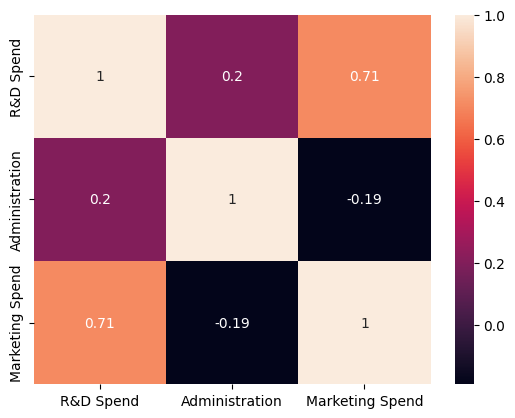

In [320]:
sns.heatmap(X[num_cols].corr(), annot=True)

In [321]:
# Preprocessor pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [322]:
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

In [323]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [324]:
# Run models
print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'Gap':<10}")
print("-" * 50)
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    train_preds = pipeline.predict(X_train)
    test_preds = pipeline.predict(X_test)
    
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)
    gap = train_score - test_score

    print(f"{name:<20} {train_score:<10.4f} {test_score:<10.4f} {gap:<10.4f}")

Model                Train R²   Test R²    Gap       
--------------------------------------------------
Linear Regression    0.9411     0.9713     -0.0302   
Decision Tree        1.0000     0.7657     0.2343    
XGBoost              1.0000     0.9455     0.0545    
